# 1. Set up

In [1]:
## Import library
import os
import json
import warnings
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

## Set working directory
os.chdir('/Users/yeonju/Desktop/로켓펀치/ham-spam')


In [2]:
## Import data
with open('spam.json') as f:
    spam = json.load(f)

with open('ham.json') as f:
    ham = json.load(f)

# Json to Dataframe
spam = pd.DataFrame.from_dict(spam, orient = 'columns')
ham = pd.DataFrame.from_dict(ham, orient = 'columns')

In [3]:
print(np.shape(spam))
print(np.shape(ham))

print(np.shape(spam)[0] / (np.shape(spam)[0] + np.shape(ham)[0]))

(369, 23)
(69297, 23)
0.005296701403841185


전체 데이터의 0.5%가 spam인 unbalanced 데이터

In [4]:
## Spam 여부를 나타내는 spam 변수 추가
spam['spam'] = 1
ham['spam'] = 0


In [5]:
## Divide data into train and test 
np.random.seed(1)
spam = spam.sample(frac = 1)
ham = ham.sample(frac = 1)

data = pd.concat([spam.iloc[:round(np.shape(spam)[0] * 0.6), :], ham.iloc[:round(np.shape(ham)[0] * 0.6), :]])
test = pd.concat([spam.iloc[round(np.shape(spam)[0] * 0.6) : , :], ham.iloc[round(np.shape(ham)[0] * 0.6) : , :]])

np.random.seed(1)
data = data.sample(frac = 1)
test = test.sample(frac = 1)

spam = data[data['spam'] == 1]
ham = data[data['spam'] == 0]

print(np.shape(data))
print(np.shape(test))


(41799, 24)
(27867, 24)


In [6]:
## NaN 확인
# replace blank with NaN
spam = spam.replace(r'', np.NaN)
ham = ham.replace(r'', np.NaN)

spam.isnull().sum(axis = 0) / np.shape(spam)[0] * 100

blog                     99.547511
can_military_service      0.000000
cover                    93.665158
description              72.398190
employee_count           98.642534
exit_type                96.832579
facebook                 98.190045
found_date               74.208145
github                  100.000000
googleplus              100.000000
homepage                 93.212670
instagram                98.642534
kakao_story             100.000000
logo                     80.995475
name                      2.262443
overview                 85.972851
permalink                 0.000000
phone                    97.285068
pinterest               100.000000
twitter                 100.000000
view_count                0.000000
yellow_id               100.000000
youtube                 100.000000
spam                      0.000000
dtype: float64

In [7]:
ham.isnull().sum(axis = 0) / np.shape(ham)[0] * 100

blog                    99.415556
can_military_service     0.000000
cover                   94.237337
description             81.723508
employee_count          97.729569
exit_type               99.468469
facebook                96.214344
found_date              83.755832
github                  99.930252
googleplus              99.913416
homepage                85.958921
instagram               98.785415
kakao_story             99.805185
logo                    84.159892
name                     0.610900
overview                90.153447
permalink                0.000000
phone                   58.199048
pinterest               99.930252
twitter                 99.013902
view_count               0.000000
yellow_id               99.547838
youtube                 99.778729
spam                     0.000000
dtype: float64

In [8]:
## NaN의 개수를 나타내는 num_nan 변수 추가
data = data.replace(r'', np.NaN)
test = test.replace(r'', np.NaN)

data['num_nan'] = data.isnull().sum(axis = 1)
test['num_nan'] = test.isnull().sum(axis = 1)

In [9]:
## Save test data
test.to_csv('o_test.csv', encoding = 'utf-8', index = False)


# 2. Explore variables

### 1) blog


blog는 spam 여부에 따라 큰 차이를 보이지 않음
-> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [10]:
tf = data['blog'].isnull()
data['blog'] = abs(tf.astype('int') - 1)

tf = test['blog'].isnull()
test['blog'] = abs(tf.astype('int') - 1)


### 2. can_military_service

In [11]:
pd.crosstab(spam['can_military_service'], columns='count')


col_0,count
can_military_service,
0,221


In [12]:
pd.crosstab(ham['can_military_service'], columns='count')


col_0,count
can_military_service,
0,41493
1,48
2,37


### 3. cover

cover는 spam 여부에 따라 큰 차이를 보이지 않음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [13]:
tf = data['cover'].isnull()
data['cover'] = abs(tf.astype('int') - 1)

tf = test['cover'].isnull()
test['cover'] = abs(tf.astype('int') - 1)


### 4. description

In [15]:
spam[-spam['description'].isnull()].description.head()

65              ㅂㅈㄷ
18               de
348    카카오톡ID: CA80
250              ee
273               -
Name: description, dtype: object

In [16]:
ham[-ham['description'].isnull()].description.head()

7173                 1958년에 사라진 미국의 고급자동차 브랜드
21999    새로운 만남을 기다리시는 분들을 위한 소셜 데이팅 서비스입니다:)
32729                                       1
7524        PVC프로파일, 시스템창호를 취급하는 플라스틱 창호 제조업체
15014                              편리한 생활을 위해
Name: description, dtype: object

spam 여부에 따라 description에 자주 쓰이는 단어의 분포가 다름

In [17]:
from ckonlpy.tag import Twitter
from ckonlpy.tag import Postprocessor

spam_desc = spam.description.str.cat(sep=' ')

twitter = Twitter()

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
spam_desc = postprocessor.pos(spam_desc)

spam_desc = [x[0] for x in spam_desc]
spam_desc = [x for x in spam_desc if len(x) > 1]

pd.crosstab(np.array(spam_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
오피,27
부산,18
카지노,16
상품권,11
매입,10
건마,10
휴게텔,9
모바일,9
핸플,9


In [18]:
ham_desc = ham.description.str.cat(sep=' ')

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
ham_desc = postprocessor.pos(ham_desc)

ham_desc = [x[0] for x in ham_desc]
ham_desc = [x for x in ham_desc if len(x) > 1]

pd.crosstab(np.array(ham_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
서비스,1203
개발,944
기업,799
회사,746
플랫폼,603
전문,591
업체,556
제조업체,515
생산,407


In [19]:
data.description[data.description.isnull()] = '-'
test.description[test.description.isnull()] = '-'

Train의 description에 사용 된 단어를 몇 개 포함하고 있는지 나타내는 새로운 변수 추가  
스팸 여부에 따라 두 변수 description_spam, description_ham 추가

In [20]:
description_spam = []
description_ham = []

for idx in range(np.shape(data)[0]) :  
    data_noun = data.iloc[idx, 3] 
    
    noun = '-'
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    description_spam.append(len([x for x in noun if x in spam_desc]))
    description_ham.append(len([x for x in noun if x in ham_desc]))

data['description_spam'] = description_spam
data['description_ham'] = description_ham

data = data.drop('description', axis = 1)
data.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,homepage,...,phone,pinterest,twitter,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham
7173,0,0,0,NaN,NaN,NaN,1899-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,105,NaN,NaN,0,16,1,5
42514,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,02-593-7773,NaN,NaN,5,NaN,NaN,0,18,0,0
21999,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,23,NaN,NaN,0,18,0,5
18615,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,71,NaN,NaN,0,19,0,0
37576,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,0,19,0,0


In [21]:
description_spam = []
description_ham = []

for idx in range(np.shape(test)[0]) :  
    data_noun = test.iloc[idx, 3] 
    
    noun = '-'
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    description_spam.append(len([x for x in noun if x in spam_desc]))
    description_ham.append(len([x for x in noun if x in ham_desc]))

test['description_spam'] = description_spam
test['description_ham'] = description_ham

test = test.drop('description', axis = 1)
test.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,homepage,...,phone,pinterest,twitter,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham
488,0,0,1,NaN,3.0,NaN,2013-03-05,NaN,NaN,NaN,...,NaN,NaN,NaN,2381,NaN,NaN,0,15,0,0
47998,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,02-3477-0681,NaN,NaN,8,NaN,NaN,0,18,0,0
15879,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,113,NaN,NaN,0,19,0,0
42897,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,02-2279-3631,NaN,NaN,6,NaN,NaN,0,18,0,0
9217,0,0,0,NaN,NaN,NaN,None,NaN,NaN,NaN,...,NaN,NaN,NaN,99,NaN,NaN,0,19,0,0


### 5. employee_count

In [22]:
pd.crosstab(spam['employee_count'], columns='count')


col_0,count
employee_count,
1.0,2
6.0,1


In [23]:
pd.crosstab(ham['employee_count'], columns='count')


col_0,count
employee_count,
0.0,490
1.0,384
2.0,57
3.0,7
4.0,1
5.0,4
6.0,1


employee_count는 spam 여부에 따라 큰 차이를 보이지 않고 NaN의 비중이 많음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [24]:
tf = data['employee_count'].isnull()
data['employee_count'] = abs(tf.astype('int') - 1)

tf = test['employee_count'].isnull()
test['employee_count'] = abs(tf.astype('int') - 1)



### 6. exit_type

In [25]:
pd.crosstab(spam['exit_type'], columns='count')


col_0,count
exit_type,
3.0,7


In [26]:
pd.crosstab(ham['exit_type'], columns='count')


col_0,count
exit_type,
0.0,104
1.0,7
2.0,42
3.0,68


spam 데이터에서 NaN의 비중이 많음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [27]:
tf = data['exit_type'].isnull()
data['exit_type'] = abs(tf.astype('int') - 1)

tf = test['exit_type'].isnull()
test['exit_type'] = abs(tf.astype('int') - 1)



### 7. facebook

값이 있으면 1 없으면 0인 binary 변수로 변환

In [28]:
tf = data['facebook'].isnull()
data['facebook'] = abs(tf.astype('int') - 1)

tf = test['facebook'].isnull()
test['facebook'] = abs(tf.astype('int') - 1)


### 8. found_date

found_date은 spam 여부에 따라 큰 차이를 보이지 않음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [29]:
tf = data['found_date'].isnull()
data['found_date'] = abs(tf.astype('int') - 1)

tf = test['found_date'].isnull()
test['found_date'] = abs(tf.astype('int') - 1)



### 9. github

값이 있으면 1 없으면 0인 binary 변수로 변환

In [30]:
tf = data['github'].isnull()
data['github'] = abs(tf.astype('int') - 1)

tf = test['github'].isnull()
test['github'] = abs(tf.astype('int') - 1)


### 10. googleplus

값이 있으면 1 없으면 0인 binary 변수로 변환

In [31]:
tf = data['googleplus'].isnull()
data['googleplus'] = abs(tf.astype('int') - 1)

tf = test['googleplus'].isnull()
test['googleplus'] = abs(tf.astype('int') - 1)


### 11. homepage

spam 데이터에서 homepage가 NaN이거나 글자수가 더 짧은 경우가 많음 -> homepage의 글자수를 나타내는 새로운 변수 homepage_n 추가

In [32]:
data.homepage[data.homepage.isnull()] = ''

homepage_n = []
for sh in data.homepage :
    sh = re.sub('http://', '', sh)
    sh = re.sub('https://', '', sh)
    sh = re.sub('www.', '', sh)
    sh = re.sub('.com.*', '', sh)
    
    homepage_n.append(len(sh))

data = data.drop('homepage', axis = 1)
data['homepage_n'] = homepage_n

data.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,pinterest,twitter,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham,homepage_n
7173,0,0,0,0,0,0,1,0,0,NaN,...,NaN,NaN,105,NaN,NaN,0,16,1,5,0
42514,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,5,NaN,NaN,0,18,0,0,0
21999,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,23,NaN,NaN,0,18,0,5,0
18615,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,71,NaN,NaN,0,19,0,0,0
37576,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,6,NaN,NaN,0,19,0,0,0


In [33]:
test.homepage[test.homepage.isnull()] = ''

homepage_n = []
for sh in test.homepage :
    sh = re.sub('http://', '', sh)
    sh = re.sub('https://', '', sh)
    sh = re.sub('www.', '', sh)
    sh = re.sub('.com.*', '', sh)
    
    homepage_n.append(len(sh))

test = test.drop('homepage', axis = 1)
test['homepage_n'] = homepage_n

test.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,pinterest,twitter,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham,homepage_n
488,0,0,1,0,1,0,1,0,0,NaN,...,NaN,NaN,2381,NaN,NaN,0,15,0,0,0
47998,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,8,NaN,NaN,0,18,0,0,0
15879,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,113,NaN,NaN,0,19,0,0,0
42897,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,6,NaN,NaN,0,18,0,0,0
9217,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,99,NaN,NaN,0,19,0,0,0


### 12. instagram

값이 있으면 1 없으면 0인 binary 변수로 변환

In [34]:
tf = data['instagram'].isnull()
data['instagram'] = abs(tf.astype('int') - 1)

tf = test['instagram'].isnull()
test['instagram'] = abs(tf.astype('int') - 1)


### 13. kakao_story

값이 있으면 1 없으면 0인 binary 변수로 변환

In [35]:
tf = data['kakao_story'].isnull()
data['kakao_story'] = abs(tf.astype('int') - 1)

tf = test['kakao_story'].isnull()
test['kakao_story'] = abs(tf.astype('int') - 1)



### 14. logo

logo는 spam 여부에 따라 큰 차이를 보이지 않음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [36]:
tf = data['logo'].isnull()
data['logo'] = abs(tf.astype('int') - 1)

tf = test['logo'].isnull()
test['logo'] = abs(tf.astype('int') - 1)



### 15. name

In [40]:
spam[-spam['name'].isnull()].name.head()

131      OO정보기술
168         -=-
138        ㅁㄴㅇㄹ
65        ㅈㅂㄷㅈㄷ
18     dedsfsdf
Name: name, dtype: object

In [41]:
ham[-ham['name'].isnull()].name.head()

7173            패커드
42514    전상용특허법률사무소
21999          오늘하루
18615      (주)위드웨이브
37576        노무법인 수
Name: name, dtype: object

spam 여부에 따라 name에 자주 쓰이는 단어의 분포가 다름

In [42]:
spam_desc = spam.name.str.cat(sep=' ')

twitter = Twitter()

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
spam_desc = postprocessor.pos(spam_desc)

spam_desc = [x[0] for x in spam_desc]
spam_desc = [x for x in spam_desc if len(x) > 1]

pd.crosstab(np.array(spam_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
영상,15
카지노,13
오피,13
티켓,12
카톡,11
강남,9
휴대폰,7
백마,7
상품권,7


In [43]:
ham_desc = ham.name.str.cat(sep=' ')

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
ham_desc = postprocessor.pos(ham_desc)

ham_desc = [x[0] for x in ham_desc]
ham_desc = [x for x in ham_desc if len(x) > 1]

pd.crosstab(np.array(ham_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
사무소,9162
법률,7573
법인,7175
법무,6457
변호사,5320
특허법,1996
특허,834
노무,814
국제,622


In [44]:
data.name[data.name.isnull()] = '-'
test.name[test.name.isnull()] = '-'


Train의 name에 사용 된 단어를 몇 개 포함하고 있는지 나타내는 새로운 변수 추가  
스팸 여부에 따라 두 변수 description_name, description_name 추가

In [45]:
name_spam = []
name_ham = []

for idx in range(np.shape(data)[0]) :  
    data_noun = data.iloc[idx, 12] 
    
    noun = '-'
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    name_spam.append(len([x for x in noun if x in spam_desc]))
    name_ham.append(len([x for x in noun if x in ham_desc]))

data['name_spam'] = name_spam
data['name_ham'] = name_ham

data = data.drop('name', axis = 1)
data.head()



,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham
7173,0,0,0,0,0,0,1,0,0,0,...,105,NaN,NaN,0,16,1,5,0,0,1
42514,0,0,0,0,0,0,0,0,0,0,...,5,NaN,NaN,0,18,0,0,0,0,3
21999,0,0,0,0,0,0,0,0,0,0,...,23,NaN,NaN,0,18,0,5,0,0,2
18615,0,0,0,0,0,0,0,0,0,0,...,71,NaN,NaN,0,19,0,0,0,0,2
37576,0,0,0,0,0,0,0,0,0,0,...,6,NaN,NaN,0,19,0,0,0,0,2


In [46]:
name_spam = []
name_ham = []

for idx in range(np.shape(test)[0]) :  
    data_noun = test.iloc[idx, 12] 
    
    noun = '-'
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    name_spam.append(len([x for x in noun if x in spam_desc]))
    name_ham.append(len([x for x in noun if x in ham_desc]))

test['name_spam'] = name_spam
test['name_ham'] = name_ham

test = test.drop('name', axis = 1)
test.head()



,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,view_count,yellow_id,youtube,spam,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham
488,0,0,1,0,1,0,1,0,0,0,...,2381,NaN,NaN,0,15,0,0,0,0,2
47998,0,0,0,0,0,0,0,0,0,0,...,8,NaN,NaN,0,18,0,0,0,0,3
15879,0,0,0,0,0,0,0,0,0,0,...,113,NaN,NaN,0,19,0,0,0,0,2
42897,0,0,0,0,0,0,0,0,0,0,...,6,NaN,NaN,0,18,0,0,0,0,4
9217,0,0,0,0,0,0,0,0,0,0,...,99,NaN,NaN,0,19,0,0,0,0,0


### 16. overview

In [47]:
spam[-spam['overview'].isnull()].overview.head()

348    모바일상품권 전문매입 인캐시\r\n카톡: ca80\r\n모바일상품권 전문매입 인캐시...
186    안녕하세여\r\n브이티켓입니다\r\n휴대폰결제 상담 및 모바일상품권 최고가 매입합니...
14                                           <p><br></p>
344    안녕하세요\r\n힘찬상품권입니다\r\n업계최고가매입하고있습니다\r\n타업체 시세 비...
329    온라인으로 즐길수 있는 인터넷카지노 싸이트 입니다\r\n베팅제한 롤링규정이 없는 V...
Name: overview, dtype: object

In [48]:
ham[-ham['overview'].isnull()].overview.head()

32729                                       ㄴㅇㄹㄴㅇㄹㄴㅇㄹㄴㅇㄹㅇㄹ
10898    25년 동안 시장 1위를 지켜온 전국 1800개 최대규모 약국체인입니다.  \n\n...
27548    "데이터 인텔리전스" 지능형 데이터 중심의 미래를 꿈꾸는 기업. 알스프릿입니다.\r...
29203    재미와 즐거움을 만들어내는 게임제작\r\n 그 시각과 과정 그리고 끝에서 우리는 "...
503      나홀로 떠난 여행길, 현실을 떠나 느껴지는 자유로움과 함께 미지의 세계에 대한 궁금...
Name: overview, dtype: object

spam 여부에 따라 overview에 자주 쓰이는 단어의 분포가 다름

In [49]:
spam_desc = spam.overview.str.cat(sep=' ')

twitter = Twitter()

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
spam_desc = postprocessor.pos(spam_desc)

spam_desc = [x[0] for x in spam_desc]
spam_desc = [x for x in spam_desc if len(x) > 1]

pd.crosstab(np.array(spam_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
상품권,44
백마,37
오피,33
모바일,32
러시아,31
카지노,29
현금,28
매입,28
교환,16


In [50]:
ham_desc = ham.overview.str.cat(sep=' ')

postprocessor = Postprocessor(twitter, passtags = 'Nouns')
ham_desc = postprocessor.pos(ham_desc)

ham_desc = [x[0] for x in ham_desc]
ham_desc = [x for x in ham_desc if len(x) > 1]

pd.crosstab(np.array(ham_desc), columns='count').sort_values('count', ascending = False)


col_0,count
row_0,
서비스,3835
개발,2220
기업,1816
회사,1738
제공,1644
기술,1478
통해,1341
사업,1223
플랫폼,1213


1. Train의 overview 사용 된 단어를 몇 개 포함하고 있는지 나타내는 새로운 변수 추가 (스팸 여부에 따라 두 변수 description_overview, description_overview 추가)  
2. 스팸이 아닌 데이터에서 글자수가 더 많은 경향을 보임 -> overview의 글자수를 나타내는 새로운 변수 overview_n 추가

In [51]:
data.overview[data.overview.isnull()] = '-'
test.overview[test.overview.isnull()] = '-'


In [52]:
overview_n = []
overview_spam = []
overview_ham = []

for idx in range(np.shape(data)[0]) :  
    data_noun = data.iloc[idx, 12] 
    
    noun = ''
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    overview_n.append(len(noun))
    overview_spam.append(len([x for x in noun if x in spam_desc]))
    overview_ham.append(len([x for x in noun if x in ham_desc]))

data['overview_n'] = overview_n
data['overview_spam'] = overview_spam
data['overview_ham'] = overview_ham

data = data.drop('overview', axis = 1)
data.head()



,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,spam,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham,overview_n,overview_spam,overview_ham
7173,0,0,0,0,0,0,1,0,0,0,...,0,16,1,5,0,0,1,0,0,0
42514,0,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,3,0,0,0
21999,0,0,0,0,0,0,0,0,0,0,...,0,18,0,5,0,0,2,0,0,0
18615,0,0,0,0,0,0,0,0,0,0,...,0,19,0,0,0,0,2,0,0,0
37576,0,0,0,0,0,0,0,0,0,0,...,0,19,0,0,0,0,2,0,0,0


In [53]:
overview_n = []
overview_spam = []
overview_ham = []

for idx in range(np.shape(test)[0]) :  
    data_noun = test.iloc[idx, 12] 
    
    noun = ''
    if len(data_noun) > 2:        
        postprocessor = Postprocessor(twitter, passtags = 'Nouns')
        noun = postprocessor.pos(data_noun)

        noun = [x[0] for x in noun]
        noun = [x for x in noun if len(x) > 1]

    overview_n.append(len(noun))
    overview_spam.append(len([x for x in noun if x in spam_desc]))
    overview_ham.append(len([x for x in noun if x in ham_desc]))

test['overview_n'] = overview_n
test['overview_spam'] = overview_spam
test['overview_ham'] = overview_ham

test = test.drop('overview', axis = 1)
test.head()



,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,spam,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham,overview_n,overview_spam,overview_ham
488,0,0,1,0,1,0,1,0,0,0,...,0,15,0,0,0,0,2,0,0,0
47998,0,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,3,0,0,0
15879,0,0,0,0,0,0,0,0,0,0,...,0,19,0,0,0,0,2,0,0,0
42897,0,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,4,0,0,0
9217,0,0,0,0,0,0,0,0,0,0,...,0,19,0,0,0,0,0,0,0,0


### 17. permalink

In [54]:
spam[-spam['permalink'].isnull()].permalink

131                                oojeongbogisul
168                                        -27641
138                                           mnr
65                                         bjdbjd
18                                aiyintechnology
179                                   jeialmidieo
12                                          -3106
53                                           rr-2
318                                        -66806
348             haendeupongyeoljehyeongeuminkaesi
250                                         ee-20
285                                        -33449
46                                 jinheungweon-1
273                                  withitsoft-1
186                                         vtk-1
298                             vipyijeontongyeog
45                                   jinheungweon
257                                        -31609
272                                        -32647
327             bigkajino-www-kby77-com-vickajino


In [55]:
ham[-ham['permalink'].isnull()].permalink

7173                                         packard
42514              jeonsangyongteugheobeobryulsamuso
21999                                      onlharu-1
18615                                 ju-wideuweibeu
37576                                  nomubeobin-su
26527                   21segiteugheobeobryul-samuso
12316                 gwangjusaneobinryeoggyoyugweon
16731                                    geimdonga-1
62912                 byeonhosajounsigbeobryulsamuso
61187                          beobmubeobin-minbon-2
32729                                     notiplus-1
35330                              ju-kemteuronigseu
68317                                ju-peulraespom9
3358                                          lg-cns
37668                               nomubeobin-muhag
65105             byeonhosahonghoseongbeobryulsamuso
37405                                 nomubeobin-ciu
15133                                          uripe
7524                                    shine-

spam 데이터에서 permalink가 numeric인 경우가 많이 발견 -> permalink가 numeric이면 1 아니면 0인 binary 변수로 변환

In [56]:
pm_binary = []
for pm in data.permalink :
    try:
        pm = int(pm)
        pm_binary.append(1)
    except:
        pm_binary.append(0)

data = data.drop('permalink', axis = 1)
data['pm_binary'] = pm_binary

data.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham,overview_n,overview_spam,overview_ham,pm_binary
7173,0,0,0,0,0,0,1,0,0,0,...,16,1,5,0,0,1,0,0,0,0
42514,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,3,0,0,0,0
21999,0,0,0,0,0,0,0,0,0,0,...,18,0,5,0,0,2,0,0,0,0
18615,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,2,0,0,0,0
37576,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,2,0,0,0,0


In [57]:
pd.crosstab(data[data['pm_binary'] == 1].spam, columns = 'count')

col_0,count
spam,
0,15
1,32


In [58]:
pm_binary = []
for pm in test.permalink :
    try:
        pm = int(pm)
        pm_binary.append(1)
    except:
        pm_binary.append(0)

test = test.drop('permalink', axis = 1)
test['pm_binary'] = pm_binary

test.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham,overview_n,overview_spam,overview_ham,pm_binary
488,0,0,1,0,1,0,1,0,0,0,...,15,0,0,0,0,2,0,0,0,0
47998,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,3,0,0,0,0
15879,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,2,0,0,0,0
42897,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,4,0,0,0,0
9217,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0


### 18. phone

phone은 spam 여부에 따라 큰 차이를 보이지 않음 -> 값이 있으면 1 없으면 0인 binary 변수로 변환

In [59]:
tf = data['phone'].isnull()
data['phone'] = abs(tf.astype('int') - 1)

tf = test['phone'].isnull()
test['phone'] = abs(tf.astype('int') - 1)


### 19. pinterest

값이 있으면 1 없으면 0인 binary 변수로 변환

In [60]:
tf = data['pinterest'].isnull()
data['pinterest'] = abs(tf.astype('int') - 1)

tf = test['pinterest'].isnull()
test['pinterest'] = abs(tf.astype('int') - 1)



### 20. twitter

값이 있으면 1 없으면 0인 binary 변수로 변환

In [61]:
tf = data['twitter'].isnull()
data['twitter'] = abs(tf.astype('int') - 1)

tf = test['twitter'].isnull()
test['twitter'] = abs(tf.astype('int') - 1)



### 21. view_count

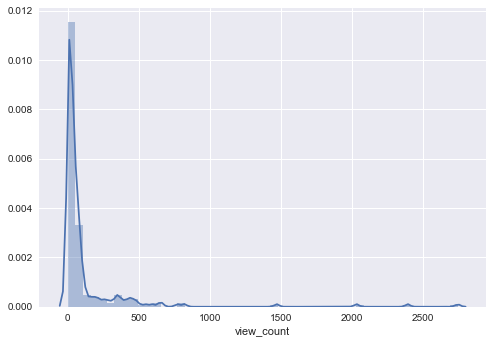

In [62]:
import seaborn as sns

sns.distplot(spam['view_count'])            
plt.show()

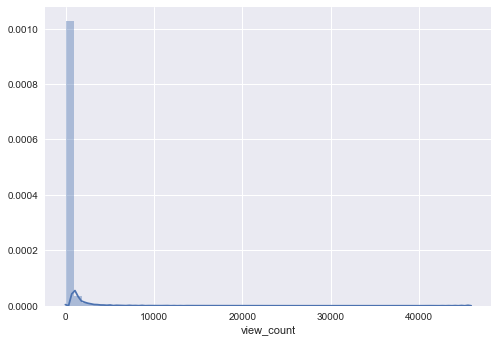

In [63]:
sns.distplot(ham['view_count'])            
plt.show()

### 22. yellow_id

값이 있으면 1 없으면 0인 binary 변수로 변환

In [66]:
tf = data['yellow_id'].isnull()
data['yellow_id'] = abs(tf.astype('int') - 1)

tf = test['yellow_id'].isnull()
test['yellow_id'] = abs(tf.astype('int') - 1)



### 23. youtube

값이 있으면 1 없으면 0인 binary 변수로 변환

In [67]:
tf = data['youtube'].isnull()
data['youtube'] = abs(tf.astype('int') - 1)

tf = test['youtube'].isnull()
test['youtube'] = abs(tf.astype('int') - 1)



### 24. num_nan

In [68]:
pd.crosstab(data[data['spam'] == 1].num_nan, columns = 'count')


col_0,count
num_nan,
12,2
13,4
14,11
15,11
16,17
17,21
18,11
19,142
20,2


In [69]:
pd.crosstab(data[data['spam'] == 0].num_nan, columns = 'count')


col_0,count
num_nan,
4,1
5,7
6,19
7,30
8,109
9,223
10,394
11,525
12,690


# 3. Save data


In [70]:
data.to_csv('data.csv', encoding = 'utf-8', index = False)
test.to_csv('test.csv', encoding = 'utf-8', index = False)
